In [24]:
import numpy as np #numpy is used for data manipulation and analysis.
import pandas as pd #pandas is used for numerical operations.
import matplotlib.pyplot as plt #matplotlib.pyplot and seaborn are
import seaborn as sns  #used for data visualization 

In [25]:
df = pd.read_csv("C:/Users/nkgag/Downloads/Zomato data .csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [26]:
df = pd.read_csv("Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [27]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [28]:
# let's convert the data type of the "rate" column to float and 
# remove the denominator
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [29]:
# Summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

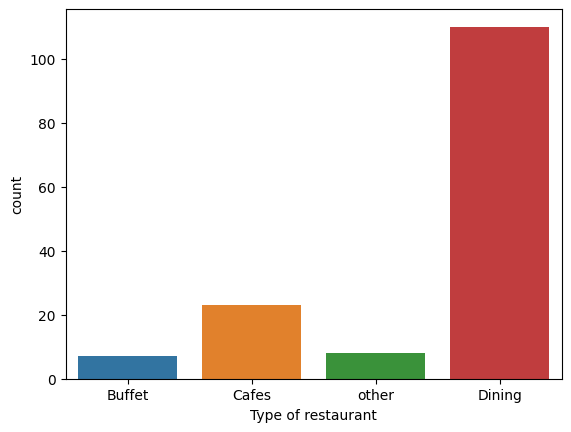

In [30]:
# Type of Resturant 
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")

# Conclusion: The majority of the restaurants fall into the dining category.

Text(0, 0.5, 'Votes')

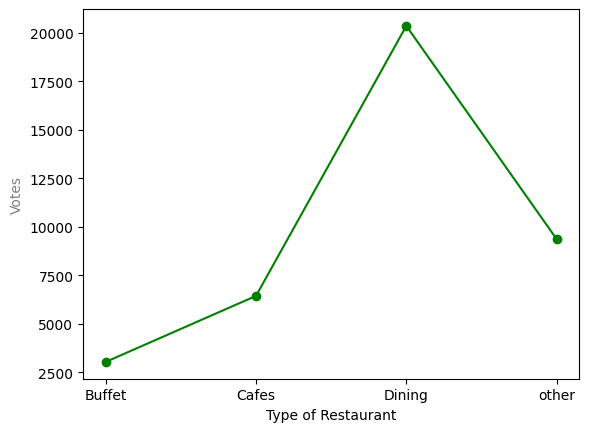

In [42]:
# Dining restaurants are preferred by a larger number of individuals. 
grouped_data = df.groupby("listed_in(type)")['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result,c="green", marker ="o")
plt.xlabel("Type of Restaurant", c="Black",size=10)
plt.ylabel("Votes",c="gray", size=10)

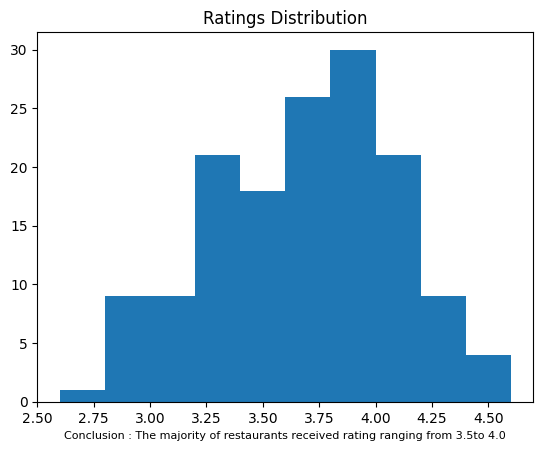

In [54]:
# THe Majority of restaurants recevied ratings 
plt.hist(df['rate'],bins=10)
plt.title("Ratings Distribution")
plt.xlabel("Conclusion : The majority of restaurants received rating ranging from 3.5to 4.0", c="Black",size=8)
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

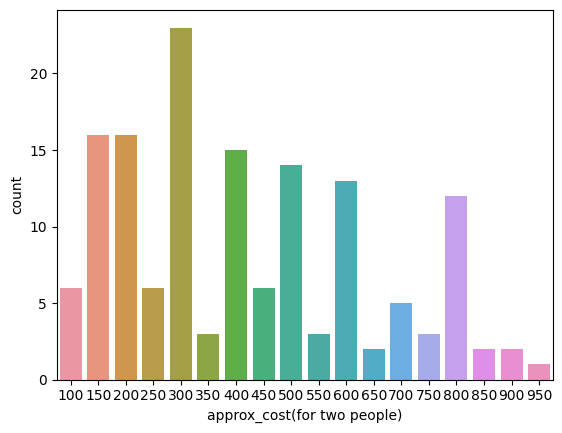

In [62]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)


In [63]:
# Whether online oeders receive higher ratings than offline orders

In [64]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

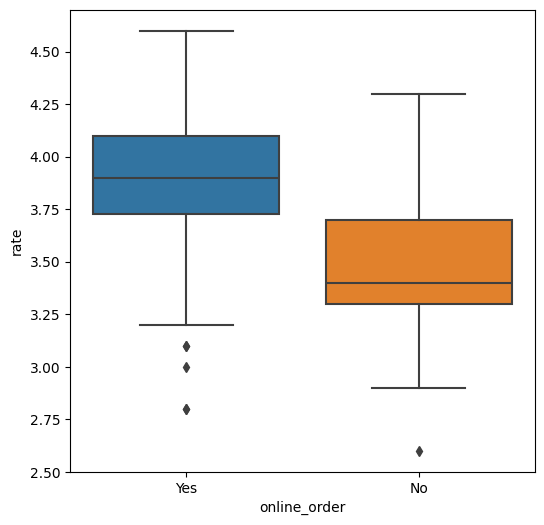

In [66]:
plt.figure(figsize = (6,6))
sns.boxplot(x = "online_order", y = 'rate', data = df)

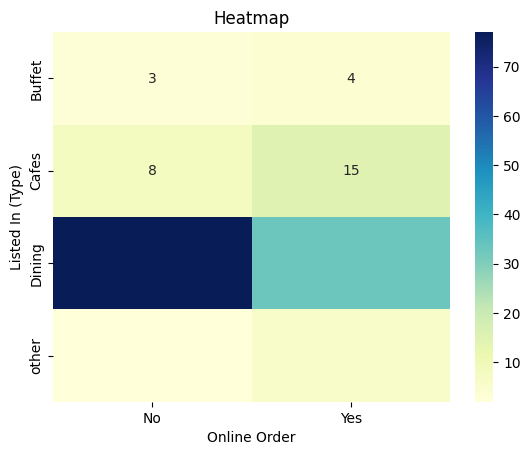

In [75]:
pivot_table = df.pivot_table(index='listed_in(type)', columns = 'online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu",fmt='d')
plt.title("Heatmap")  
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()